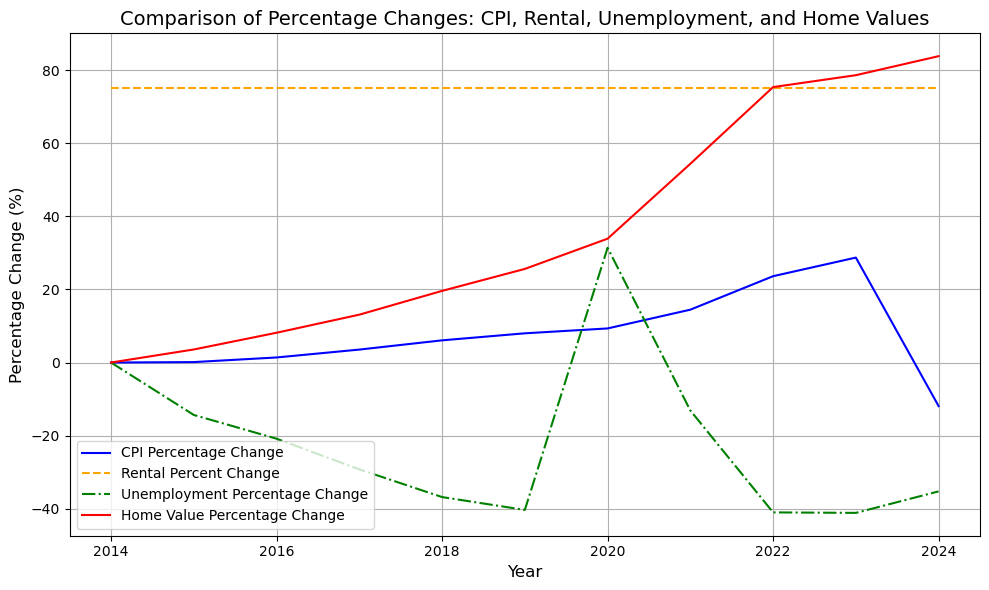

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
inflation_data = pd.read_csv('../SOURCE/inflationUSpast10years-CSV.csv')
rental_data = pd.read_csv('../SOURCE/rental_df.csv')
unemployment_data = pd.read_csv('../SOURCE/UnemploymentRate.csv')
home_values_data = pd.read_csv('../SOURCE/Metro_Home_Values.csv')

# Data Preprocessing for the last 10 years (assuming 2014-2023)
inflation_data_last_10_years = inflation_data[inflation_data['Year'] >= 2014]
rental_data_last_10_years = rental_data[rental_data['RegionName'] == 'United States']

# Convert the DATE column to datetime format before using .dt
unemployment_data['DATE'] = pd.to_datetime(unemployment_data['DATE'], errors='coerce')

# Create a copy of the filtered unemployment data and avoid SettingWithCopyWarning
unemployment_data_last_10_years = unemployment_data[unemployment_data['DATE'].dt.year >= 2014].copy()
unemployment_data_last_10_years['Year'] = unemployment_data_last_10_years['DATE'].dt.year
avg_unemployment_per_year = unemployment_data_last_10_years.groupby('Year')['UNRATE'].mean().reset_index()

# Extract home values from 2014 onwards
home_values_last_10_years = home_values_data.iloc[:, -121:].T
home_values_last_10_years.index = pd.to_datetime(home_values_last_10_years.index)
home_values_last_10_years['Year'] = home_values_last_10_years.index.year
avg_home_value_per_year = home_values_last_10_years.groupby('Year').mean()

# Merge data together based on the 'Year' column
merged_data = pd.merge(inflation_data_last_10_years, avg_unemployment_per_year, on='Year', how='left')
merged_data = pd.merge(merged_data, avg_home_value_per_year, on='Year', how='left')

# Calculate percentage changes
cpi_percentage_change = (inflation_data_last_10_years.iloc[:, 1:13].mean(axis=1) - inflation_data_last_10_years.iloc[:, 1:13].mean(axis=1).iloc[0]) / inflation_data_last_10_years.iloc[:, 1:13].mean(axis=1).iloc[0] * 100

# Handle constant rental percentage change by extending it to match the length of other data
if 'RentalPercentChange' in rental_data_last_10_years.columns:
    rental_percentage_change = rental_data_last_10_years['RentalPercentChange'].values
else:
    rental_percentage_change = [75.027201]  # Assuming a constant 75% change, modify as needed
rental_percentage_change = [rental_percentage_change[0]] * len(merged_data['Year'])

# Calculate unemployment and home value percentage changes
unemployment_percentage_change = (merged_data['UNRATE'] - merged_data['UNRATE'].iloc[0]) / merged_data['UNRATE'].iloc[0] * 100
home_value_percentage_change = (avg_home_value_per_year.mean(axis=1) - avg_home_value_per_year.mean(axis=1).iloc[0]) / avg_home_value_per_year.mean(axis=1).iloc[0] * 100

# Check the lengths of all arrays
# print("Length of Year:", len(merged_data['Year']))
# print("Length of CPI percentage change:", len(cpi_percentage_change))
# print("Length of Rental percentage change:", len(rental_percentage_change))
# print("Length of Unemployment percentage change:", len(unemployment_percentage_change))
# print("Length of Home value percentage change:", len(home_value_percentage_change))

# Plot the percentage changes
plt.figure(figsize=(10, 6))

# Plot percentage change for CPI
plt.plot(merged_data['Year'], cpi_percentage_change, label='CPI Percentage Change', color='blue')

# Plot percentage change for rental
plt.plot(merged_data['Year'], rental_percentage_change, label='Rental Percent Change', color='orange', linestyle='--')

# Plot percentage change for the unemployment rate
plt.plot(merged_data['Year'], unemployment_percentage_change, label='Unemployment Percentage Change', color='green', linestyle='-.')

# Plot percentage change for home values
plt.plot(merged_data['Year'], home_value_percentage_change, label='Home Value Percentage Change', color='red', linestyle='-')

plt.title('Comparison of Percentage Changes: CPI, Rental, Unemployment, and Home Values', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
